In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
training = pd.read_csv('train.csv', dtype= {'id':int,'store_nbr':int, 'unit_sales':float, 'onpromotion':str}, parse_dates=['date'])
items = pd.read_csv('items.csv')
stores=pd.read_csv('stores.csv')
test=pd.read_csv('test.csv',parse_dates=['date'])
transactions = pd.read_csv('transactions.csv',parse_dates=['date'])
holidays_events=pd.read_csv('holidays_events.csv',parse_dates=['date'])
sample_submission=pd.read_csv('sample_submission.csv')

In [79]:
print(items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   int64 
 1   family      4100 non-null   object
 2   class       4100 non-null   int64 
 3   perishable  4100 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.3+ KB
None


In [30]:
print(items.head())

   item_nbr        family  class  perishable
0     96995     GROCERY I   1093           0
1     99197     GROCERY I   1067           0
2    103501      CLEANING   3008           0
3    103520     GROCERY I   1028           0
4    103665  BREAD/BAKERY   2712           1


In [33]:
print(items['family'].value_counts(normalize=True))

GROCERY I                     0.325366
BEVERAGES                     0.149512
CLEANING                      0.108780
PRODUCE                       0.074634
DAIRY                         0.059024
PERSONAL CARE                 0.037317
BREAD/BAKERY                  0.032683
HOME CARE                     0.026341
DELI                          0.022195
MEATS                         0.020488
HOME AND KITCHEN I            0.018780
LIQUOR,WINE,BEER              0.017805
FROZEN FOODS                  0.013415
POULTRY                       0.013171
HOME AND KITCHEN II           0.010976
EGGS                          0.010000
CELEBRATION                   0.007561
LAWN AND GARDEN               0.006341
PREPARED FOODS                0.006341
LADIESWEAR                    0.005122
AUTOMOTIVE                    0.004878
LINGERIE                      0.004878
BEAUTY                        0.004634
PLAYERS AND ELECTRONICS       0.004146
SCHOOL AND OFFICE SUPPLIES    0.003659
GROCERY II               

In [36]:
print(items['perishable'].value_counts(normalize=True))

0    0.759512
1    0.240488
Name: perishable, dtype: float64


In [37]:
print(transactions.head())

        date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922


In [38]:
print(stores.head())

   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4


In [47]:
stores['city'].value_counts(normalize=True)

Quito            0.333333
Guayaquil        0.148148
Cuenca           0.055556
Santo Domingo    0.055556
Manta            0.037037
Latacunga        0.037037
Machala          0.037037
Ambato           0.037037
Quevedo          0.018519
Esmeraldas       0.018519
Loja             0.018519
Libertad         0.018519
Playas           0.018519
Daule            0.018519
Babahoyo         0.018519
Salinas          0.018519
Puyo             0.018519
Guaranda         0.018519
Ibarra           0.018519
Riobamba         0.018519
Cayambe          0.018519
El Carmen        0.018519
Name: city, dtype: float64

In [43]:
stores['state'].value_counts(normalize=True)

Pichincha                         0.351852
Guayas                            0.203704
Santo Domingo de los Tsachilas    0.055556
Azuay                             0.055556
Manabi                            0.055556
Cotopaxi                          0.037037
Tungurahua                        0.037037
Los Rios                          0.037037
El Oro                            0.037037
Chimborazo                        0.018519
Imbabura                          0.018519
Bolivar                           0.018519
Pastaza                           0.018519
Santa Elena                       0.018519
Loja                              0.018519
Esmeraldas                        0.018519
Name: state, dtype: float64

In [44]:
stores['type'].value_counts(normalize=True)

D    0.333333
C    0.277778
A    0.166667
B    0.148148
E    0.074074
Name: type, dtype: float64

In [39]:
print(training.head())

   id       date  store_nbr  item_nbr  unit_sales onpromotion
0   0 2013-01-01         25    103665         7.0         NaN
1   1 2013-01-01         25    105574         1.0         NaN
2   2 2013-01-01         25    105575         2.0         NaN
3   3 2013-01-01         25    108079         1.0         NaN
4   4 2013-01-01         25    108701         1.0         NaN


In [48]:
print(holidays_events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB
None


In [49]:
items_with_other_inf = pd.merge(items,training,on='item_nbr',left_on=None, right_on=None, left_index=False, right_index=False,
                                sort=True,
                                 suffixes=("_item", "_training"))

In [51]:

items_with_other_info_1=pd.merge(items_with_other_inf,holidays_events, on ='date', left_on=None, right_on=None,
                              left_index=False, right_index=False, sort=True, suffixes=("_item","_holiday"))

In [52]:
items_with_other_info=pd.merge(items_with_other_info_1,stores, on ='store_nbr', left_on=None, right_on=None,
                              left_index=False, right_index=False, sort=True, suffixes=("_training","_store"))


Recap of data science problem
Corporación Favorita is a large Ecuadorian-based grocery retailer that operates hundreds of supermarkets and needs a forecasting model that will accurately predict the unit sales by product. Variables include store type, location, oil price, promotional information, holiday information and product type. The grocery store wants to ensure they can have just enough of the right products at the right time.The scope of the solution space remains within the 4000 products from 54 different store locations. Our model will not be predicting any unit sales outside of these products and store locations.The data provided has variables that include store number, item number, unit sales, and promotion information. The training data set covers 2013-2016 and the test set data is a 16-day window in 2017. There is store metadata available categorizing stores, listing location. There is also metadata for the products including family, class, and perishable. There is also data on holiday and events to show breaks in the work days. There is also daily oil price included for the time frame of the train and test data.  Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices.


In [54]:
items_with_other_info.head()

,item_nbr,family,class,perishable,id,date,store_nbr,unit_sales,onpromotion,type_training,locale,locale_name,description,transferred,city,state,type_store,cluster
0,103520,GROCERY I,1028,0,122402,2013-01-05,1,3.0,NaN,Work Day,National,Ecuador,Recupero puente Navidad,False,Quito,Pichincha,D,13
1,103665,BREAD/BAKERY,2712,1,122403,2013-01-05,1,4.0,NaN,Work Day,National,Ecuador,Recupero puente Navidad,False,Quito,Pichincha,D,13
2,105574,GROCERY I,1045,0,122404,2013-01-05,1,4.0,NaN,Work Day,National,Ecuador,Recupero puente Navidad,False,Quito,Pichincha,D,13
3,105575,GROCERY I,1045,0,122405,2013-01-05,1,7.0,NaN,Work Day,National,Ecuador,Recupero puente Navidad,False,Quito,Pichincha,D,13
4,105577,GROCERY I,1045,0,122406,2013-01-05,1,2.0,NaN,Work Day,National,Ecuador,Recupero puente Navidad,False,Quito,Pichincha,D,13


In [57]:
items_with_other_info['onpromotion'].fillna(False, inplace=True)

In [60]:
items_with_other_info.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21828208 entries, 0 to 21828207
Data columns (total 18 columns):
 #   Column         Dtype         
---  ------         -----         
 0   item_nbr       int64         
 1   family         object        
 2   class          int64         
 3   perishable     int64         
 4   id             int64         
 5   date           datetime64[ns]
 6   store_nbr      int64         
 7   unit_sales     float64       
 8   onpromotion    object        
 9   type_training  object        
 10  locale         object        
 11  locale_name    object        
 12  description    object        
 13  transferred    bool          
 14  city           object        
 15  state          object        
 16  type_store     object        
 17  cluster        int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(6), object(9)
memory usage: 2.9+ GB


In [61]:
items_with_other_info['perishable']=items_with_other_info['perishable'].astype('bool')
items_with_other_info['onpromotion']=items_with_other_info['onpromotion'].astype('bool')
items_with_other_info['class']=items_with_other_info['class'].astype('category')

In [62]:
items_with_other_info['locale'].describe()

count     21828208
unique           3
top       National
freq      11468026
Name: locale, dtype: object

In [63]:
items_with_other_info['locale'].value_counts(normalize=True)

National    0.525376
Local       0.411010
Regional    0.063614
Name: locale, dtype: float64

In [64]:
items_with_other_info['locale_name'].describe()

count     21828208
unique          24
top        Ecuador
freq      11468026
Name: locale_name, dtype: object

In [27]:
items_with_other_info['locale_name'].value_counts(normalize=True)

Ecuador                           0.525376
Guayaquil                         0.040786
Riobamba                          0.033699
Latacunga                         0.031156
Guaranda                          0.030665
Quito                             0.030042
Ambato                            0.026682
Cuenca                            0.020843
El Carmen                         0.018724
Santo Domingo                     0.018724
Cayambe                           0.018261
Esmeraldas                        0.017822
Machala                           0.017467
Imbabura                          0.017467
Cotopaxi                          0.017357
Manta                             0.017302
Puyo                              0.016023
Libertad                          0.015723
Salinas                           0.015365
Loja                              0.014425
Santa Elena                       0.014422
Santo Domingo de los Tsachilas    0.014368
Quevedo                           0.013670
Ibarra     

In [ ]:
items_with_other_info['unit_sales'].describe()

In [ ]:
items_with_other_info[items_with_other_info['unit_sales']==items_with_other_info['unit_sales'].min()]

In [ ]:
item=items_with_other_info[items_with_other_info['item_nbr']==119026]

In [ ]:
item[item['unit_sales']<0]
#earth quake 2016 in manabi. probably inventory that was damaged / lost.

In [70]:
subset=items_with_other_info[items_with_other_info['item_nbr']==119026]['unit_sales'].max()
items_with_other_info.loc[subset]

item_nbr                        208699
family                       GROCERY I
class                             1034
perishable                       False
id                              157319
date               2013-01-05 00:00:00
store_nbr                           46
unit_sales                         4.0
on_sale                          False
type                          Work Day
locale                        National
locale_name                    Ecuador
description    Recupero puente Navidad
transferred                      False
Name: 4720, dtype: object

In [68]:
items_with_other_info[items_with_other_info['unit_sales']<0]


,item_nbr,family,class,perishable,id,date,store_nbr,unit_sales,onpromotion,type_training,locale,locale_name,description,transferred,city,state,type_store,cluster
32665,979197,CLEANING,3028,False,13551407,2013-11-06,1,-1.0,False,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False,Quito,Pichincha,D,13
44588,1229664,PERSONAL CARE,4138,False,15907517,2013-12-23,1,-1.0,False,Additional,National,Ecuador,Navidad-2,False,Quito,Pichincha,D,13
46160,454596,GROCERY I,1092,False,16012906,2013-12-26,1,-2.0,False,Additional,National,Ecuador,Navidad+1,False,Quito,Pichincha,D,13
92881,691945,CLEANING,3026,False,28546944,2014-08-05,1,-6.0,True,Holiday,Local,Esmeraldas,Fundacion de Esmeraldas,False,Quito,Pichincha,D,13
95140,916886,CLEANING,3024,False,29073890,2014-08-15,1,-1.0,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21394404,1465644,LINGERIE,7016,False,79206046,2016-05-14,53,-204.0,True,Event,National,Ecuador,Terremoto Manabi+28,False,Manta,Manabi,D,13
21429372,841842,GROCERY I,1072,False,87843347,2016-08-12,53,-8.0,True,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Manta,Manabi,D,13
21534378,1463555,BEVERAGES,1114,False,123294360,2017-07-25,53,-5.0,True,Additional,Local,Guayaquil,Fundacion de Guayaquil,False,Manta,Manabi,D,13
21636009,1239912,DAIRY,2172,True,41367083,2015-02-17,54,-2.0,True,Holiday,National,Ecuador,Carnaval,False,El Carmen,Manabi,C,3


In [70]:
items_with_other_info[items_with_other_info['unit_sales']<0]['state'].value_counts(normalize=True)


Pichincha                         0.568642
Guayas                            0.165041
Tungurahua                        0.039760
Santo Domingo de los Tsachilas    0.038260
Azuay                             0.034509
El Oro                            0.022506
Manabi                            0.021755
Los Rios                          0.021005
Bolivar                           0.020255
Santa Elena                       0.018755
Loja                              0.015754
Cotopaxi                          0.010503
Imbabura                          0.008252
Esmeraldas                        0.006752
Chimborazo                        0.006002
Pastaza                           0.002251
Name: state, dtype: float64

In [72]:
items_with_other_info[items_with_other_info['unit_sales']<0]['type_store'].value_counts(normalize=True)


D    0.463616
A    0.232558
B    0.142536
C    0.117779
E    0.043511
Name: type_store, dtype: float64

In [79]:
items_with_other_info[items_with_other_info['unit_sales']<0]['transferred'].value_counts(normalize=True)


False    0.967742
True     0.032258
Name: transferred, dtype: float64

In [81]:
items_with_other_info[items_with_other_info['unit_sales']<0]['onpromotion'].value_counts(normalize=True)


True     0.91973
False    0.08027
Name: onpromotion, dtype: float64

In [83]:
items_with_other_info[items_with_other_info['unit_sales']>=0]['onpromotion'].value_counts(normalize=True)


True     0.886314
False    0.113686
Name: onpromotion, dtype: float64

In [86]:
items_with_other_info[items_with_other_info['unit_sales']>=0].describe()


,item_nbr,id,store_nbr,unit_sales,cluster
count,2.182688e+07,2.182688e+07,2.182688e+07,2.182688e+07,2.182688e+07
mean,9.943372e+05,6.580127e+07,2.754794e+01,9.069951e+00,8.723073e+00
std,5.257786e+05,3.393733e+07,1.629883e+01,3.716796e+01,4.621393e+00
min,9.699500e+04,0.000000e+00,1.000000e+00,9.000000e-03,1.000000e+00
25%,5.578100e+05,3.641448e+07,1.200000e+01,2.000000e+00,4.000000e+00
50%,1.009539e+06,7.504422e+07,2.800000e+01,4.000000e+00,9.000000e+00
75%,1.400334e+06,9.313590e+07,4.300000e+01,9.000000e+00,1.300000e+01
max,2.127114e+06,1.254970e+08,5.400000e+01,8.944000e+04,1.700000e+01


In [89]:
items_with_other_info[items_with_other_info['unit_sales']<0].describe()


,item_nbr,id,store_nbr,unit_sales,cluster
count,1.333000e+03,1.333000e+03,1333.000000,1333.000000,1333.000000
mean,1.083172e+06,6.776620e+07,24.709677,-50.203068,9.231058
std,5.422162e+05,3.154770e+07,17.509556,265.535691,4.612852
min,1.035200e+05,1.369690e+05,1.000000,-4673.000000,1.000000
25%,6.383080e+05,3.800853e+07,7.000000,-6.000000,6.000000
50%,1.160882e+06,7.690057e+07,23.000000,-2.000000,9.000000
75%,1.463887e+06,8.899280e+07,44.000000,-1.000000,13.000000
max,2.081175e+06,1.254730e+08,54.000000,-0.002000,17.000000


In [95]:
items_with_other_info=items_with_other_info[items_with_other_info['unit_sales']>=0]

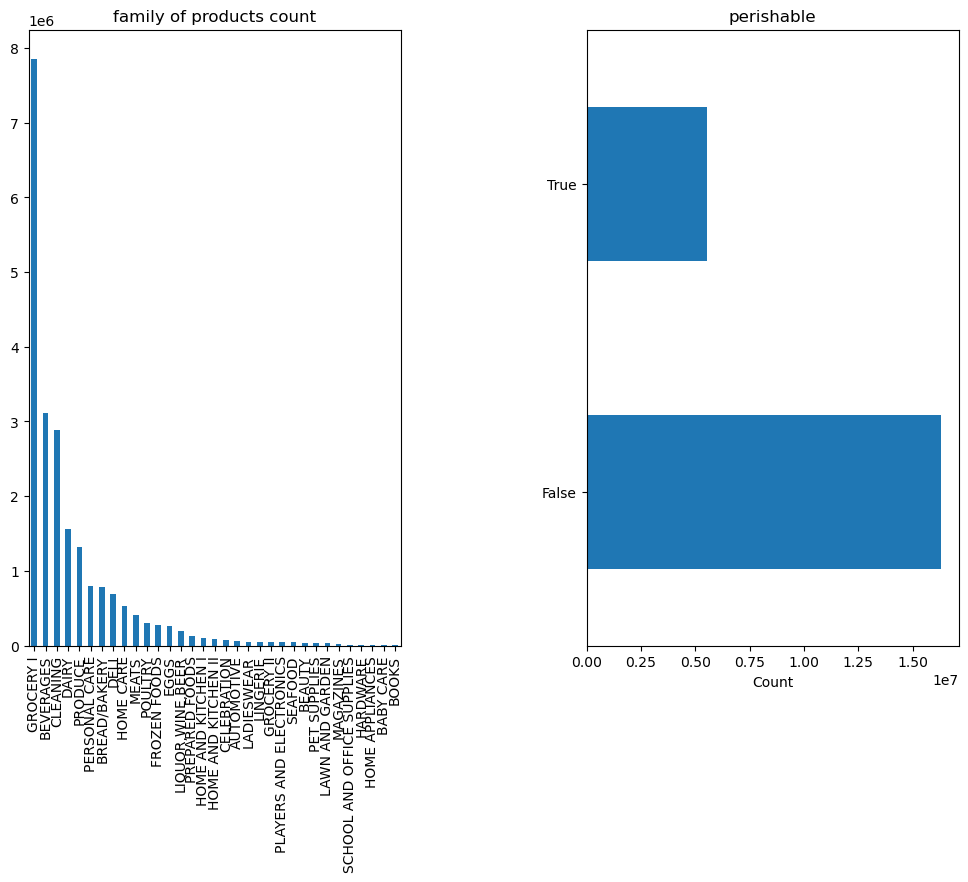

In [96]:

#Code task 13#
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
items_with_other_info.family.value_counts().plot(kind='bar', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('family of products count')
#Label the xaxis 'Count'
#Give the plot a helpful title of 'state'
items_with_other_info.perishable.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('perishable')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);
#You're encouraged to explore a few

In [97]:
items_with_other_info.rename(columns={'onpromotion':'on_sale'},inplace=True)

/var/folders/gq/789ffg0j3_s7scj27n_mdkj40000gn/T/ipykernel_95510/1252523642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_with_other_info.rename(columns={'onpromotion':'on_sale'},inplace=True)


Text(0.5, 1.0, 'perishable')

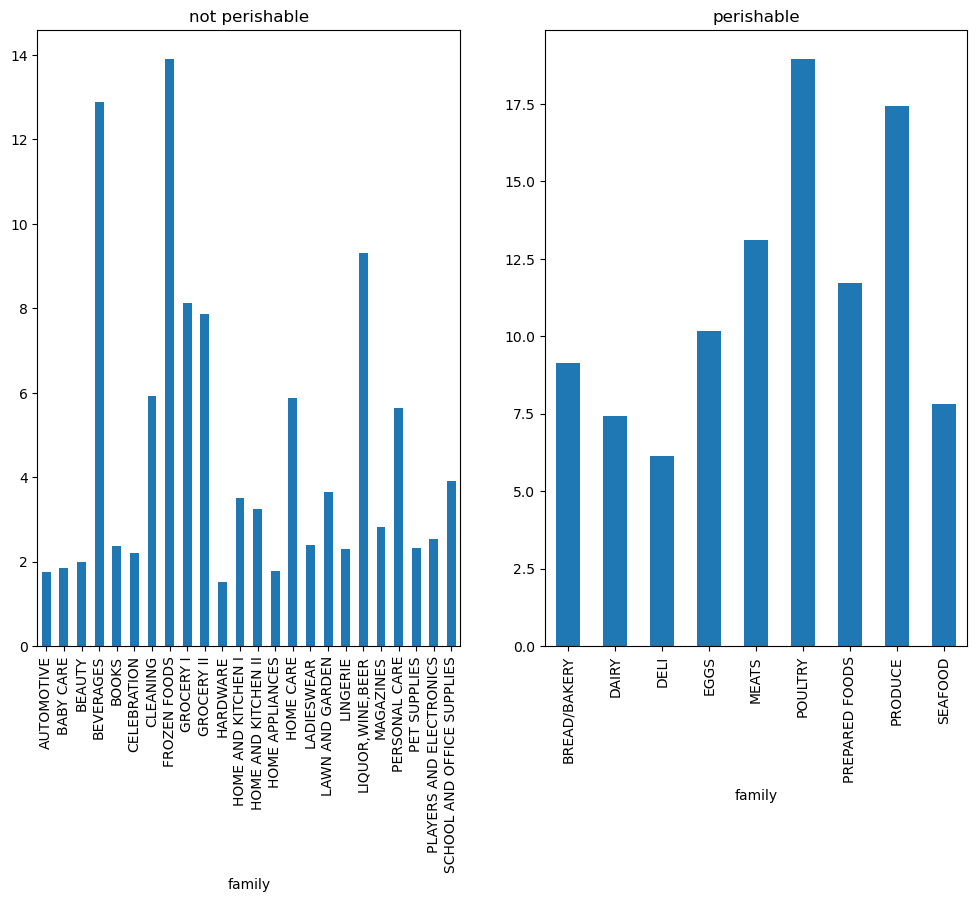

In [98]:
df=items_with_other_info.groupby('family')['unit_sales'].mean()
df_not_perishable_grouped=items_with_other_info[items_with_other_info['perishable']==0].groupby('family')['unit_sales'].mean()
df_perishable_grouped=items_with_other_info[items_with_other_info['perishable']==1].groupby('family')['unit_sales'].mean()

#Code task 13#
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig,ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df_not_perishable_grouped.plot(kind='bar',ax=ax[0])
df_perishable_grouped.plot(kind='bar',ax=ax[1])
#Give the plot a helpful title of 'Region'
ax[0].set_title('not perishable')
ax[1].set_title('perishable')


              
              # importing pandas library 

<Axes: xlabel='family'>

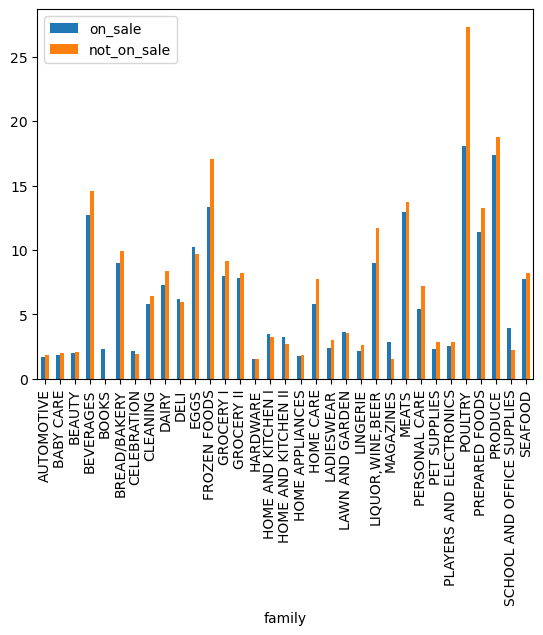

In [93]:
df_not_on_sale_grouped=items_with_other_info[items_with_other_info['on_sale']==False].groupby('family')['unit_sales'].mean()
df_on_sale_ungrouped=items_with_other_info[items_with_other_info['on_sale']==True]
df_on_sale_grouped = df_on_sale_ungrouped.groupby('family')['unit_sales'].mean()
# plotting graph 
new_df = pd.DataFrame({'on_sale':df_on_sale_grouped, 'not_on_sale':df_not_on_sale_grouped}).reset_index()
new_df.plot(x='family',y=["on_sale", "not_on_sale"], kind="bar") 

<Axes: xlabel='family'>

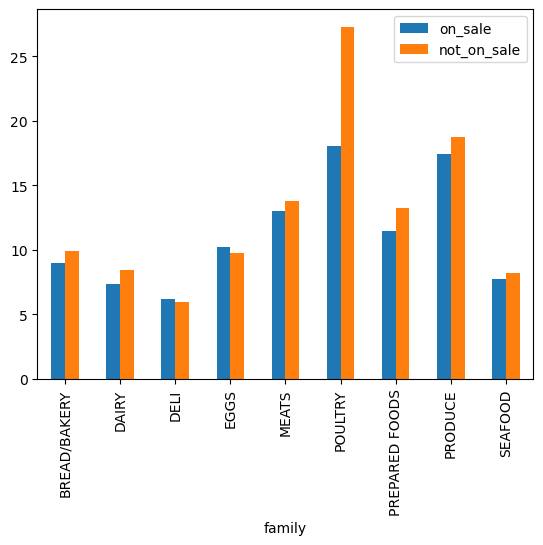

In [99]:
df_perishable_on_sale_grouped=items_with_other_info[(items_with_other_info['on_sale']==True)&(items_with_other_info['perishable']==1)].groupby('family')['unit_sales'].mean()
df_perishable_not_on_sale_grouped=items_with_other_info[(items_with_other_info['on_sale']==False)&(items_with_other_info['perishable']==1)].groupby('family')['unit_sales'].mean()
#Code task 13#
perish_df = pd.DataFrame({'on_sale':df_perishable_on_sale_grouped, 'not_on_sale':df_perishable_not_on_sale_grouped}).reset_index()
perish_df.plot(x='family',y=["on_sale", "not_on_sale"], kind="bar")

<Axes: xlabel='family'>

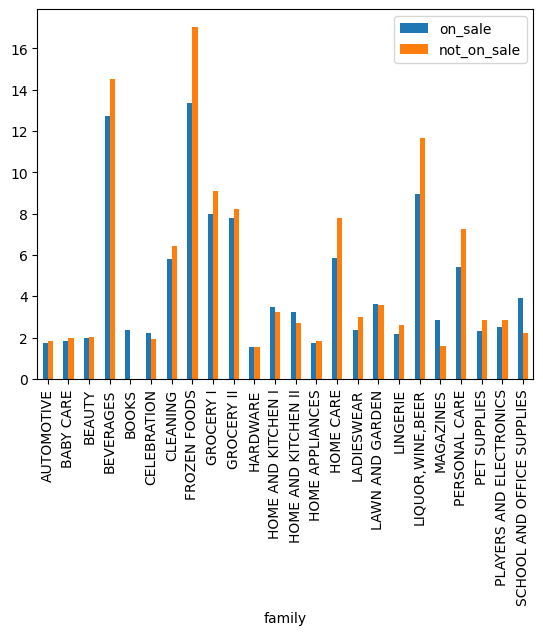

In [94]:

df_notperishable_on_sale_grouped=items_with_other_info[(items_with_other_info['on_sale']==True)&(items_with_other_info['perishable']==0)].groupby('family')['unit_sales'].mean()
df_notperishable_not_on_sale_grouped=items_with_other_info[(items_with_other_info['on_sale']==False)&(items_with_other_info['perishable']==0)].groupby('family')['unit_sales'].mean()
#Code task 13#
notperish_df = pd.DataFrame({'on_sale':df_notperishable_on_sale_grouped, 'not_on_sale':df_notperishable_not_on_sale_grouped}).reset_index()
notperish_df.plot(x='family',y=["on_sale", "not_on_sale"], kind="bar")